<a href="https://colab.research.google.com/github/pornpailinjanjit/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [4]:
data = pd.read_csv('search_request.csv', encoding='iso-8859-11')
data

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.634739,101.463177
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.800882,102.533777
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.738260,100.371405
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.666877,101.860838
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.237242,99.879998
...,...,...,...,...,...,...,...,...,...,...
91005,91006,463dd825-9161-463d-91af-3b0eacb1d5f0,2018-06-30 19:52:46.400,"Wongnai/10.0 (iPhone9,3; iOS; 11.4; th_TH;)",NaN,26843.0,6b5mhcqr0d8fo901eckl1bl6t5,3,13.746350,100.529186
91006,91007,c04f924e-dcdc-40be-b75e-1025b1731915,2018-06-30 14:51:28.768,"Wongnai/10.0 (iPhone9,3; iOS; 11.4; th_TH;)",NaN,NaN,7l11kilc079ihpjst27fudqmss,3,13.672342,100.438595
91007,91008,9f16cbd0-a161-45f3-811b-e4449fca6ba8,2018-06-30 19:47:26.025,"Wongnai/10.0 (iPhone9,4; iOS; 10.1; en_US;)",NaN,NaN,3q7tsnam9h9vcqieer7at3da8t,3,12.958767,100.886196
91008,91009,972485b4-99a6-4a0c-b8b8-1d65fedf4fff,2018-06-30 15:59:07.076,"Wongnai/10.0 (iPhone9,4; iOS; 10.2; en_TH;)",NaN,NaN,se3duhp5s9opob0t0nt27tq7h,3,13.870236,100.472936


#เตรียมข้อมูล

### แกปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [5]:
data['search_timestamp']= pd.to_datetime(data['search_timestamp'],dayfirst=True,errors ='coerce') #เปลี่ยนstring เป็นdatetime
data

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.634739,101.463177
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.800882,102.533777
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.738260,100.371405
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.666877,101.860838
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.237242,99.879998
...,...,...,...,...,...,...,...,...,...,...
91005,91006,463dd825-9161-463d-91af-3b0eacb1d5f0,2018-06-30 19:52:46.400,"Wongnai/10.0 (iPhone9,3; iOS; 11.4; th_TH;)",NaN,26843.0,6b5mhcqr0d8fo901eckl1bl6t5,3,13.746350,100.529186
91006,91007,c04f924e-dcdc-40be-b75e-1025b1731915,2018-06-30 14:51:28.768,"Wongnai/10.0 (iPhone9,3; iOS; 11.4; th_TH;)",NaN,NaN,7l11kilc079ihpjst27fudqmss,3,13.672342,100.438595
91007,91008,9f16cbd0-a161-45f3-811b-e4449fca6ba8,2018-06-30 19:47:26.025,"Wongnai/10.0 (iPhone9,4; iOS; 10.1; en_US;)",NaN,NaN,3q7tsnam9h9vcqieer7at3da8t,3,12.958767,100.886196
91008,91009,972485b4-99a6-4a0c-b8b8-1d65fedf4fff,2018-06-30 15:59:07.076,"Wongnai/10.0 (iPhone9,4; iOS; 10.2; en_TH;)",NaN,NaN,se3duhp5s9opob0t0nt27tq7h,3,13.870236,100.472936


#Bar chart (กราฟแท่ง)
กราฟเปรียบเทียบปริมาณ

In [6]:
from matplotlib import pyplot as plt

In [7]:
mon = data[data['search_timestamp'].dt.dayofweek == 0].count()
tue = data[data['search_timestamp'].dt.dayofweek == 1].count()
wen = data[data['search_timestamp'].dt.dayofweek == 2].count()
thu = data[data['search_timestamp'].dt.dayofweek == 3].count()
fri = data[data['search_timestamp'].dt.dayofweek == 4].count()
sat = data[data['search_timestamp'].dt.dayofweek == 5].count()
son = data[data['search_timestamp'].dt.dayofweek == 6].count()

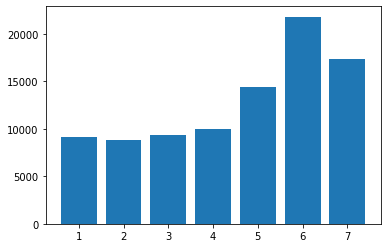

In [8]:
plt.bar([1,2,3,4,5,6,7],[mon.iloc[2],tue.iloc[2],wen.iloc[2],thu.iloc[2],fri.iloc[2],sat.iloc[2],son.iloc[2]]);

In [9]:
data[data['search_timestamp'].dt.dayofweek == 0].shape[0]

9198

<BarContainer object of 7 artists>

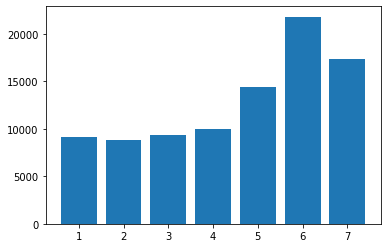

In [10]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                        ])

ส่วนประกอบขิงกราฟแท่ง
* ตัวกราฟแท่ง(height)
* ตำแหน่งกราฟแท่ง(x)
* ชื่อแท่ง (tick_label)
* ชื่อกราฟ(plt.title)
* ชื่อแกน x (plt.xlabel)
* ชื่อแกน y (plt.ylabel)

Text(0, 0.5, 'Number of Requests')

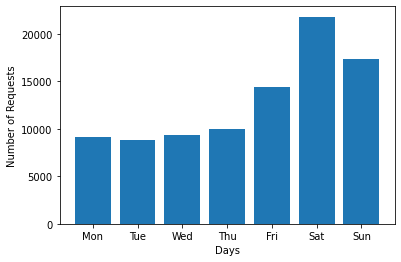

In [11]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                        ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')


In [ ]:
import matplotlib
matplotlib.__version__

'3.2.2'

# การแสดงตัวอักษรภาษาไทยในกราฟ

https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31

In [12]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [13]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

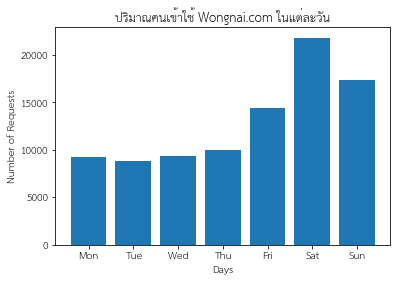

In [14]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

#Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [15]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

679

In [16]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]
b4lunch

[679, 686, 690, 790, 1007, 1626, 1581]

In [17]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

233

In [18]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[233, 233, 250, 308, 442, 470, 253]

In [19]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [20]:
import numpy as np

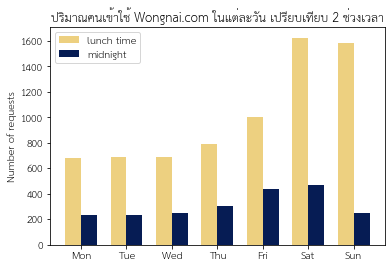

In [21]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#edd080')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#061c54')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Stacked bar chart

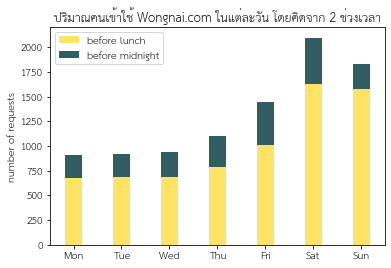

In [24]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#ffe268')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#2f5d62')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

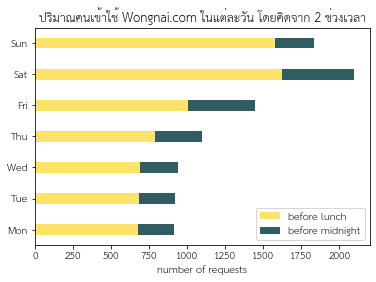

In [25]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#ffe268')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#2f5d62')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

[เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

In [28]:
labels = ['Lunch','Midnight']

NameError: ignored

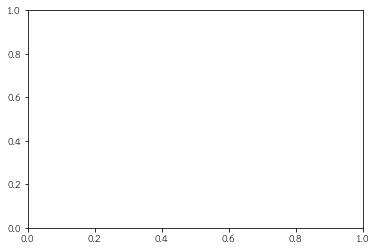

In [31]:
A = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(A - width/2, lunch, width, label='lunch_time', color='#f7ea00')
rects2 = ax.bar(A + width/2,midnight, width, label='Midnight', color = '#31326f')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();